# Задание 1

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import legendre

In [163]:
N = 5


def derivative(n, x):
    return n / (1 - x ** 2) * (legendre(n - 1)(x) - x * legendre(n)(x))


def newton_method(n, x_0):
    f = x_0 - legendre(n)(x_0) / derivative(n, x_0)
    for i in range(N):
        f = f - legendre(n)(f) / derivative(n, f)
    return f
    
    
def find_legendre_roots(n):
    if n == 1:
        return [newton_method(1, 0)]
    else:
        prev = find_legendre_roots(n - 1)
        ans = []
        ans.append(newton_method(n, (-1 + prev[0]) / 2))
        for i in range(0, n - 2):
            ans.append(newton_method(n, (prev[i] + prev[i + 1]) / 2))
        ans.append(newton_method(n, (1 + prev[n - 2]) / 2))
        return ans

In [164]:
print(find_legendre_roots(10))

[-0.9739065285171717, -0.8650633666889844, -0.6794095682990244, -0.4333953941292473, -0.14887433898163116, 0.14887433898163127, 0.43339539412924716, 0.6794095682990244, 0.8650633666889845, 0.9739065285171717]


Используем метод Ньютона для нахождения корней.

In [165]:
def integral_simpson(func, a, b, m):
    h = (b - a) / m
    return h / 6 * (func(a) + sum([4 * func(a + h / 2 * i) for i in range(1, 2 * m, 2)]) + 
                   sum([2 * func(a + h / 2 * i) for i in range(2, 2 * m, 2)]) + func(b))


def get_f(points, excluded_x):
    
    def f(x):
        y = 1
        for x_i in points:
            if x_i != excluded_x:
                y *= (x - x_i) / (excluded_x - x_i)
        return y
    
    return f


def find_gauss_weights(n):
    roots = find_legendre_roots(n)
    weights = []
    for i in range(n):
        weights.append(integral_simpson(get_f(roots, roots[i]), -1, 1, 10 ** 4))
    return weights
    

In [166]:
def f(x):
    return 1 / (1 + 9 * x ** 2)

integral = (np.arctan(3) + np.arctan(15)) / 3


def integral_gauss(n, a, b):
    roots = find_legendre_roots(n)
    weights = find_gauss_weights(n)
    return (b - a) * sum([f((b - a) * x / 2 + (b + a) / 2) * w for x,w in zip(roots, weights)]) / 2

In [167]:
def plot_difference_gauss():
    n = range(1, 40)
    error = [np.log10(abs(integral - integral_gauss(i, -1, 5))) for i in n]
    plt.plot([i for i in n], error)
    plt.xlabel('N')
    plt.ylabel('log(error)')
    plt.title('Difference')
    plt.show()  

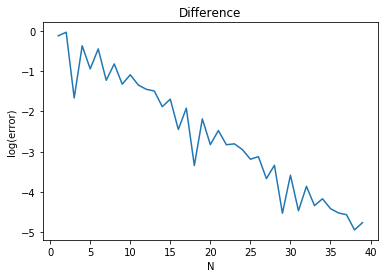

In [168]:
plot_difference_gauss()

Как видим, зависимость более-менее линейна $\Rightarrow$ погрешность убывает экспоненциально.

In [169]:
def plot_difference_simpson():
    n = range(1, 1000)
    error = [np.log10(abs(integral - integral_simpson(f, -1, 5, i))) for i in n]
    plt.plot([np.log10(i) for i in n], error)
    plt.xlabel('log(N)')
    plt.ylabel('log(error)')
    plt.title('Difference')
    plt.show()  

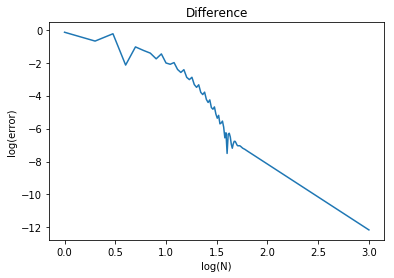

In [170]:
plot_difference_simpson()

Для симпсона погрешность $\frac{1}{N^4}$

In [171]:
def plot_compare():
    n = range(1, 40)
    error_gauss = [np.log10(abs(integral - integral_gauss(i, -1, 5))) for i in n]
    error_simpson = [np.log10(abs(integral - integral_simpson(f, -1, 5, i))) for i in n]
    plt.plot([np.log10(i) for i in n], error_simpson, label="simpson")
    plt.plot([np.log10(i) for i in n], error_gauss, label="gauss")
    plt.xlabel('log(N)')
    plt.ylabel('log(error)')
    plt.title('Difference')
    plt.legend()
    plt.show() 

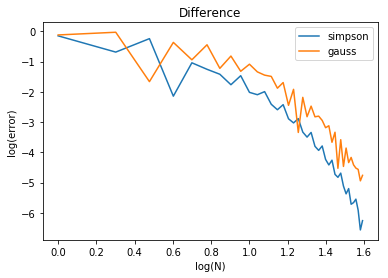

In [172]:
plot_compare()

На начальной дистанции гаусс не даёт особого преимущества и даже проигрывает, но как  видно из графика симпсона, этот изгиб превращается в прямую уже при $log(N) = 2$, а гаусс продолжает экспоненциально убывать.